## Artificial Neural Network

Project will use a toy dataset of bank members and determine if they will churn.
The model will classify the churn rate of these bank members. 
The model constructed is a feed forward neural network.

Dataset: *Churn_Modeling.csv*

### Importing the libraries

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf

### Part 1 - Data Preprocessing

#### Importing the dataset

In [27]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
print("First 5 sample parameters: ")
for i, sample in enumerate(X[:5]):
    print(y[i], " | " , sample)

First 5 sample parameters: 
1  |  [619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]
0  |  [608 'Spain' 'Female' 41 1 83807.86 1 0 1 112542.58]
1  |  [502 'France' 'Female' 42 8 159660.8 3 1 0 113931.57]
0  |  [699 'France' 'Female' 39 1 0.0 2 0 0 93826.63]
0  |  [850 'Spain' 'Female' 43 2 125510.82 1 1 1 79084.1]


#### Encoding categorical data

Label Encoding the "Gender" column

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

One Hot Encoding the "Geography" column

In [31]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Splitting the dataset into the Training set and Test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Part 2 - Building the ANN

In [64]:
hidden_units = 16

ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=hidden_units, activation='relu'),
    tf.keras.layers.Dense(units=hidden_units, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

### Part 3 - Training the ANN

#### Compiling the ANN

In [65]:
ann.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

#### Training the ANN on the Training set

In [66]:
history = ann.fit(X_train, y_train, batch_size = 32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.4967 - accuracy: 0.7905 - val_loss: 0.4421 - val_accuracy: 0.8060
Epoch 2/100
250/250 [==============================] - 0s 944us/step - loss: 0.4327 - accuracy: 0.8101 - val_loss: 0.4193 - val_accuracy: 0.8230
Epoch 3/100
250/250 [==============================] - 0s 926us/step - loss: 0.4178 - accuracy: 0.8170 - val_loss: 0.4085 - val_accuracy: 0.8255
Epoch 4/100
250/250 [==============================] - 0s 911us/step - loss: 0.4064 - accuracy: 0.8236 - val_loss: 0.3953 - val_accuracy: 0.8335
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8282 - val_loss: 0.3849 - val_accuracy: 0.8440
Epoch 6/100
250/250 [==============================] - 0s 928us/step - loss: 0.3839 - accuracy: 0.8376 - val_loss: 0.3743 - val_accuracy: 0.8410
Epoch 7/100
250/250 [==============================] - 0s 913us/step - loss: 0.3712 - accuracy: 0.8464 - val_loss: 0.3599 - val_accura

### Part 4 - Making the predictions and evaluating the model

#### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

In [67]:
print(ann.predict(sc.transform([[1.0, 0.0, 0.0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 36ms/step
[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

#### Predicting the Test set results

In [68]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

y_compare = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)),1)
print("First 5 sample predictions vs.  actuals: \n", y_compare[:5])

63/63 [==============================] - 0s 653us/step
First 5 sample predictions vs.  actuals: 
 [[0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]]


#### Making the Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)
print("Model accuracy: ", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[1495  100]
 [ 189  216]]
Model accuracy:  0.8555


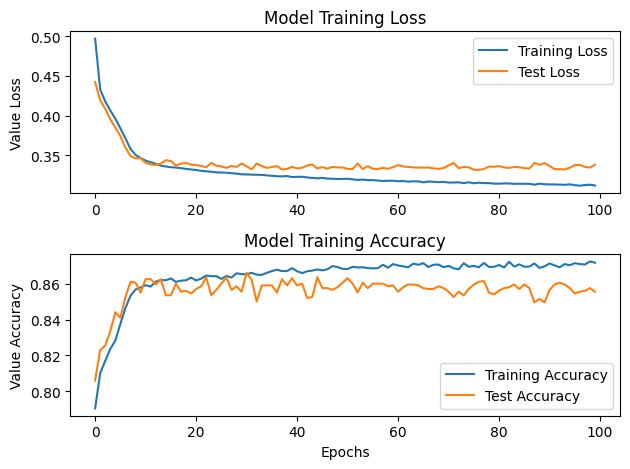

In [91]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(ncols=1, nrows=2)

ax[0].plot(history.history['loss'], label="Training Loss")
ax[0].plot(history.history['val_loss'], label="Test Loss")
ax[0].set_ylabel("Value Loss")
ax[0].set_title("Model Training Loss")
ax[0].legend()

ax[1].plot(history.history['accuracy'], label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], label="Test Accuracy")
ax[1].set_ylabel("Value Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_title("Model Training Accuracy")
ax[1].legend()

plt.tight_layout()